In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Specify Parameters
1. Risk-Free Rate $(r_f)$
2. Expected Return of Risky Portfolio $(E(r_P))$
3. Standard Deviation of Risky Portfolio $(\sigma_P)$
4. Risk Aversion Coefficient $(A)$

In [2]:
r_f = .07
E_R_P = .15
sigma_P = .22
A = 2.3

# Define Function to Calculate Expected Return of Composite Portfolio 
This function calculates the Expected Return of a Composite Portfolio $(E(r_C))$ for a given level of risk $(\sigma_C)$, using the Capital Market Line (CML) formula:

$$E(r_C) = r_f + \left( \frac{E(r_P) - r_f}{\sigma_P} \right) \cdot \sigma_C$$


In [3]:
def calculate_E_R_C(sigma_C):
    """
    This function calculates the Expected Return of a Composite Portfolio ( E(r_C) ) for a given level of risk (sigma_C), using the Capital Market Line (CML) formula.

    Input Variables:
	sigma_C: Input to the function, representing the risk (standard deviation) of the composite portfolio.    
    """
    E_R_C = r_f + ((E_R_P - r_f) / sigma_P) * sigma_C
    return E_R_C


# Generate a Range of Risk Values for the Composite Portfolio $(\sigma_C)$ and Calculate the Corresponding Expected Returns $(E(r_C))$

In [4]:
# Generate a range of risk (sigma_C) values
sigma_C_values = np.linspace(0, 0.22, 100)  

This line uses the numpy library to generate a sequence of numbers. Here’s what each part does:
1. np.linspace(start, stop, num):
   - This function generates num evenly spaced numbers between start and stop (inclusive).
   - It’s part of the numpy library, often used for numerical computations in Python.
2. start = 0:
   - The sequence starts at  0 .
3. stop = 0.22:
   - The sequence ends at  0.22 .
4. num = 100:
   - A total of  100  numbers are generated, including both the start and stop values.

What It Does:
- This code creates an array of  100  equally spaced values between  0  and  0.22 , inclusive.
- The values represent a range of possible  $\sigma_C$  (risk values) for which calculations or simulations might be performed.

# 

In [5]:
# Calculate the corresponding expected returns (E(R_C))
E_R_C_values = calculate_E_R_C(sigma_C_values)

This line calculates the various Expected Returns of the Composite Portfolio using our pre-defined function for the range of risk values $(\sigma_C)$ generated above.

# Calculate the Optimal Allocation to the Risky Portfolio

In [6]:
# Calculate the Optimal Allocation to the Risky Portfolio
y = (E_R_P - r_f)/(A*(sigma_P**2))

This line uses the equation below to solve for the optimal allocation for risk-averse investors in the risky portfolio $(y^*)$. This is the proportion of the risky portfolio at which the utility is maximized.
$$ y^* = {{E(r_P)-r_f}\over A\sigma^2_P} $$

### Calculate the Max Utility of the Optimal Portfolio

In [7]:
Max_U = r_f + y*(E_R_P - r_f) - .5 * A * (y**2) * (sigma_P**2)

This line calculates the utility value of the optimal portfolio with risky allocation $y^*$ based on the utility function below:

$$ \text{Max}\ U = r_f +y[E(r_P)-r_f]-{1\over2}Ay^2\sigma^2_P $$

# 

# Generate a range of risk values $(\sigma)$ and corresponding expected returns $(E(r))$ to plot the indifference curve for the optimal portfolio

In [8]:
sigma_range = np.linspace(0, 0.4, 500)  # Standard deviation (risk)

Similar to our $\sigma_C$ range, This function generates 500 evenly spaced numbers between 0 and 0.4 (inclusive).

In [9]:
# Calculate E(r) for the given utility and risk aversion
E_r = Max_U + 0.5 * A * sigma_range**2

Here we calculate the corresponding expected returns $(E(r))$ for the range risk values from above.

# Calculate the Standard Deviation of the Optimal Portfolio

We calculate the Standard Deviation of the Optimal Portfolio using the function $\sigma_C=y\sigma_P$

In [10]:
SD_C = y * sigma_P

# Calculate the Expected Return of the Optimal Portfolio

We calculate the expected return of the optimal portfolio using our pre-defined function (calculate_E_R_C) using the standard deviation of the optimal portfolio we calculated above as the input.

In [11]:
Optimal_E_R_C = calculate_E_R_C(SD_C)

# Print Results

In [12]:
print("Optimal Portfolio Parameters:")
print(f"Optimal Allocation to Risky Portfolio = {y:.2f}")
print(f"Optimal Allocation to Risk-Free Asset = {1-y:.2f}")
print(f"Expected Return of Composite Portfolio = {Optimal_E_R_C:.2f}")
print(f"Standard Deviation of Composit Portfolio = {SD_C:.2f}")

Optimal Portfolio Parameters:
Optimal Allocation to Risky Portfolio = 0.72
Optimal Allocation to Risk-Free Asset = 0.28
Expected Return of Composite Portfolio = 0.13
Standard Deviation of Composit Portfolio = 0.16


# Plot CAL and Indifference Curve

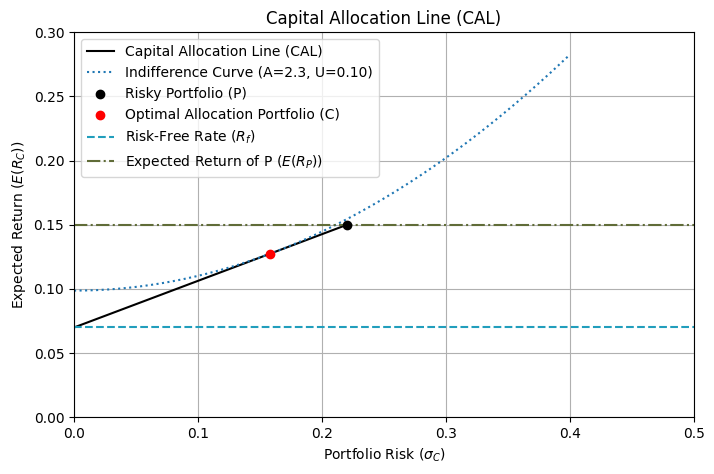

In [15]:
# Plot the Capital Allocation Line
# Re-plotting the CAL with the y-axis starting at 0
plt.figure(figsize=(8, 5))
plt.plot(sigma_C_values, E_R_C_values, label='Capital Allocation Line (CAL)', color='black')
plt.plot(sigma_range, E_r, linestyle='dotted', label=f"Indifference Curve (A={A}, U={Max_U:.2f})")
plt.scatter(sigma_P, E_R_P, color='black', label='Risky Portfolio (P)', zorder=5)
plt.scatter(SD_C, Optimal_E_R_C, color='red', label='Optimal Allocation Portfolio (C)', zorder=5)
plt.axhline(y=r_f, color='#219ebc', linestyle='--', label='Risk-Free Rate ($R_f$)')
plt.axhline(y=E_R_P, color='#606c38', linestyle='-.', label='Expected Return of P ($E(R_P)$)')

# Annotating the graph
plt.title("Capital Allocation Line (CAL)")
plt.xlabel(r"Portfolio Risk ($\sigma_C$)")
plt.ylabel("Expected Return ($E(R_C)$)")
plt.ylim(0, 0.3)  # Start y-axis at 0 and add a small margin at the top
plt.xlim(0, 0.5)
plt.legend()
plt.grid()

# Show the plot
plt.show()